In [9]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import linspace

In [10]:
INPUT_PATH_PLOT = "/home/maia/Documents/Universidade/Universidade/UNIVERSIDADE/EXPERIMENTO/3EVALUATE_NEW_VGG_CUSTOM/2ADD_DEL/VGG_NET/X-RAY/df_plots.csv"
INPUT_PATH_PKL = "/home/maia/Documents/Universidade/Universidade/UNIVERSIDADE/EXPERIMENTO/3EVALUATE_NEW_VGG_CUSTOM/2ADD_DEL/VGG_NET/X-RAY/dict_scores.pkl"
OUTPUT_PATH = "./OUT/"

In [11]:
files_plots = glob.glob("../**/df_plots.csv", recursive=True)
files_scores = glob.glob("../**/dict_scores.csv", recursive=True)

In [12]:
files_plots

['../3EVALUATE_NEW_VGG_CUSTOM/2ADD_DEL/CUSTOM_CNN/OCT/df_plots.csv',
 '../3EVALUATE_NEW_VGG_CUSTOM/2ADD_DEL/CUSTOM_CNN/X-RAY/df_plots.csv',
 '../3EVALUATE_NEW_VGG_CUSTOM/2ADD_DEL/VGG_NET/OCT/df_plots.csv',
 '../3EVALUATE_NEW_VGG_CUSTOM/2ADD_DEL/VGG_NET/X-RAY/df_plots.csv']

In [13]:
def auc(arr):
    """Returns normalized Area Under Curve of the array."""
    return (arr.sum() - arr[0] / 2 - arr[-1] / 2) / (arr.shape[0] - 1)

In [14]:
plot_df = pd.read_csv(files_plots[0], index_col=0)
techiniques = plot_df.columns
number_of_lines = len(plot_df.columns)
start = 0.0
stop = 1.0

cm_subsection = linspace(start, stop, number_of_lines) 
colors = [ cm.Set1(x) for x in cm_subsection ]
color_dict = dict(zip(techiniques, colors))

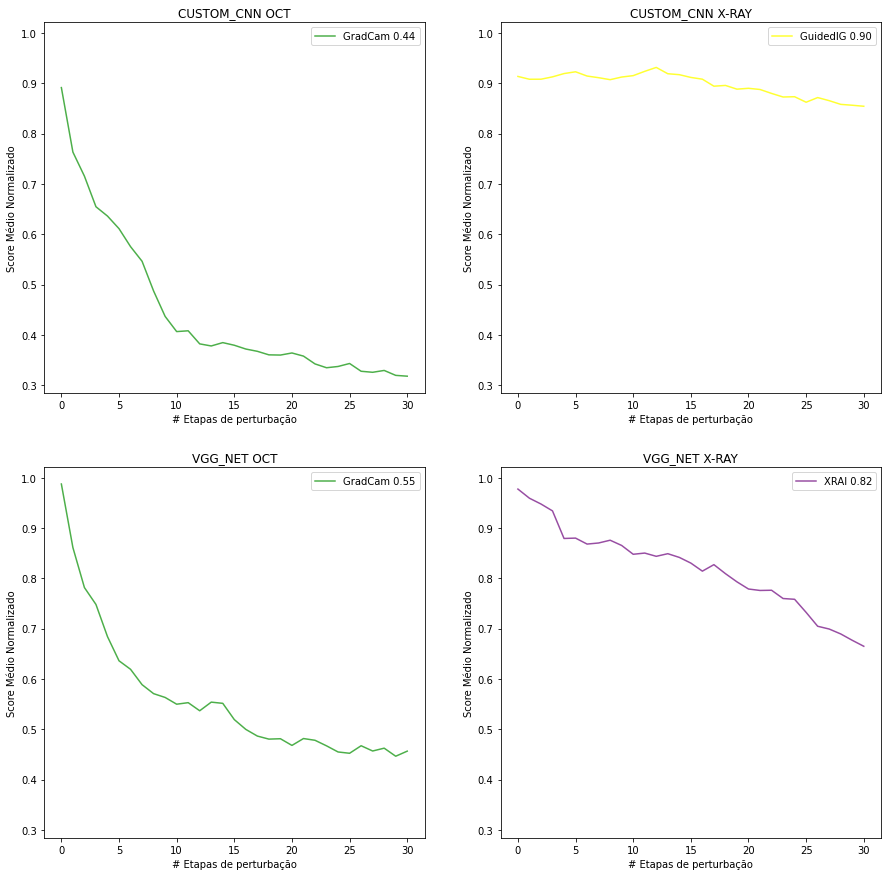

In [17]:
fig, axs = plt.subplots(2,2, sharex='all', sharey='all', figsize=(15,15))
for ax in axs.flatten():
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
for file, ax in zip(files_plots, fig.axes):
    plot_df = pd.read_csv(file, index_col=0)
    plot_dict = {col:auc(plot_df.loc[:, col].to_numpy()) for col in plot_df.columns}
    sorted_dict = sorted(plot_dict.items(), key=lambda x: x[1], reverse=True)
    for metric in sorted_dict:
        col_sort , auc_sort = metric
        legend = col_sort + " " + '%.2f' % auc_sort
        ax.plot(plot_df.loc[:, col_sort], label=legend, color=color_dict[col_sort])
        ax.legend()
        ax.set_ylabel('Score Médio Normalizado')
        ax.set_xlabel('# Etapas de perturbação')
        ax.set_title(" ".join(file.split("/")[-3:-1]))
        break
    #plt.savefig("AUC.png",transparent= False, bbox_inches= 'tight', dpi= 400)
